<div style="border:1px solid #e0e0e0; border-radius:8px; background:#f9f9f9; padding:18px 18px 10px 18px; margin-bottom:18px">
<h2 id="indice" style="margin-top:0">📑 Índice Interactivo</h2>
<ol style="font-size:1.1em;">
  <li><a href="#intro">Guía Resumen: Modelos de Regresión para Precios Inmobiliarios</a></li>
  <li><a href="#comparacion">1. Comparación de Modelos</a>
    <ul>
      <li><a href="#ranking-ampliado">1.1 Ranking Ampliado con Modelos Avanzados</a></li>
      <li><a href="#ranking-consolidado">1.2 Ranking Consolidado: Todos los Modelos Evaluados</a></li>
    </ul>
  </li>
  <li><a href="#resumen-comparativo">Resumen comparativo de modelos</a></li>
  <li><a href="#variables">2. Variables Utilizadas</a>
    <ul>
      <li><a href="#cantidad-datos">2.1 Cantidad de Datos y Variables Usadas</a></li>
      <li><a href="#variables-categoricas">Explicación detallada sobre las variables categóricas utilizadas</a></li>
      <li><a href="#variables-avanzadas">2.2 Variables utilizadas en modelos avanzados</a></li>
    </ul>
  </li>
  <li><a href="#como-utilizar">CÓMO UTILIZAR EL MODELO ADIVINADOR DE PRECIOS</a>
    <ul>
      <li><a href="#implementacion-xgboost">1. Implementación de XGBoost</a></li>
      <li><a href="#implementacion-random-forest">2. Implementación de Random Forest</a></li>
      <li><a href="#implementacion-arbol-decision">3. Implementación de Árbol de Decisión Base</a></li>
    </ul>
  </li>
  <li><a href="#consideraciones">CONSIDERACIONES ADICIONALES</a></li>
</ol>
<div style="font-size:0.95em; color:#888; margin-top:10px">Haga clic en cualquier sección para navegar directamente.</div>
</div>

<a id="intro"></a>
# 📊 Guía Resumen: Modelos de Regresión para Precios Inmobiliarios

* Este notebook presenta un resumen completo de los diferentes modelos de regresión evaluados para la predicción de precios inmobiliarios, con enfoque en la comparación de rendimiento, variables utilizadas, y guías de implementación.

* Se procedio a utilizar los datos de california-housing-eda.ipynb( en carpeta eda).

* En la carpeta ml-models se dejaron 3 notebooks:


        a) tree-decision_base (Informacion base ustilizada pra trabajar , la misa que se encuentra en california-housing-eda.ipynb ).


        b) tree-decision.ipynb ( se trabajo con modelos sin ensambles, solo se mejoraron hiperparametros y se compararon los metodos y rendimientos  en cada modelos usado con randomsearchCV greedsearchCV).


        c) en tree-decision_BEST.ipynb se realizaron entrenamientos con modelos de ensamble de tree decision. Se compararon resultados.


* Los pasos que se realizaron para la investigacion y entrenamiento de todos los modelos fueron los siguientes:
1. Cargar datos.
2. explorar el conjunto de datos.
3. Preparación de los Datos.
4. Construir modelos básicos decicion tree.
5. Ajustar los hiperparámetros del modelo, con randomsearch y con gridsearch.
6. Usar validación cruzada para una mejor evaluación del modelo.
7. Guardar los Mejores Modelos.
8. Comparar el rendimiento de los modelos con diferentes hiperparametros.

<a id="comparacion"></a>
## 1. Comparación de Modelos ( sin tener en cuenta eficiencia, consumo de recursos y facilidad de implementacion)

<a id="ranking-ampliado"></a>
### 1.1 Ranking Ampliado con Modelos Avanzados

En análisis posteriores, se evaluaron técnicas más avanzadas que mejoraron significativamente las métricas:

| Ranking | Modelo | Estrategia | MAE | MSE | RMSE | R² |
|---------|--------|-----------|-----|-----|------|-----|
| 1 | XGBoost | Ensemble Methods | $16,779 | 7.40e+08 | $27,198 | 0.8904 |
| 2 | Gradient Boosting | Ensemble Methods | $17,104 | 9.52e+08 | $30,853 | 0.9016 |
| 3 | Random Forest | Ensemble Methods | $17,586 | 8.39e+08 | $28,957 | 0.8841 |
| 4 | Árbol Podado | Pruning | $24,480 | 1.37e+09 | $37,034 | 0.7748 |
| 5 | Árbol Sin Outliers | Manejo de Outliers | $25,006 | 1.18e+09 | $34,283 | 0.7546 |
| 6 | Árbol Hiperparámetros | Hiperparámetros Extendidos | $25,437 | 1.50e+09 | $38,712 | 0.7911 |
| 7 | Árbol Base | Base | $26,944 | 1.78e+09 | $42,144 | 0.7652 |
| 8 | Árbol Feature Engineering | Ingeniería de Características | $62,414 | 8.49e+09 | $92,120 | -0.1085 |
| 9 | Árbol + Box-Cox | Transformación Variable Objetivo | $63,606 | 8.71e+09 | $93,320 | -0.1730 |
| 10 | Árbol + Yeo-Johnson | Transformación Variable Objetivo | $63,631 | 8.71e+09 | $93,342 | -0.1739 |

**Nuevo mejor modelo: XGBoost con Ensemble Methods**

### ¿Por qué XGBoost es superior?
- Logra el MAE más bajo ($16,779), reduciendo el error en casi $10,000 respecto al árbol base.
- Excelente R² (0.89), explicando casi el 90% de la variabilidad en los precios.
- RMSE muy reducido ($27,198), indicando mayor precisión general.
- Utiliza técnicas de conjunto (ensemble) que combinan múltiples árboles para mejorar la predicción.

### Comparación entre enfoques:
- **Ensemble Methods (XGBoost, Gradient Boosting, Random Forest)**: Claramente superiores con MAE entre $16,779-$17,586.
- **Técnicas de mejora de árboles individuales (Pruning, Manejo de Outliers)**: Rendimiento medio con MAE entre $24,480-$25,437.
- **Árboles base**: Rendimiento aceptable con MAE alrededor de $26,944.
- **Transformaciones especiales**: Desempeño deficiente con MAE superior a $62,000 y R² negativo.

<a id="ranking-consolidado"></a>
### 1.2 Ranking Consolidado: Todos los Modelos Evaluados teniendo en cuenta eficiencia, consumo de recursos y facilidad de implementacion)

A continuación se presenta una tabla consolidada de todos los modelos evaluados, incluyendo métricas de rendimiento, facilidad de uso y eficiencia computacional:

| Ranking | Modelo | Estrategia | MAE ($) | RMSE ($) | R² | # Cat. | # Num. | Facilidad de Uso (1-5) | Eficiencia Computacional (1-5) | Preprocesamiento |
|---------|--------|-----------|---------|----------|-----|--------|--------|------------------------|--------------------------------|------------------|
| 1 | XGBoost | Ensemble | 16,779 | 27,198 | 0.8904 | 43 | 36+ | ⭐⭐ (2) | ⭐⭐ (2) | Avanzado, Pipeline Completo |
| 2 | Gradient Boosting | Ensemble | 17,104 | 30,853 | 0.9016 | 43 | 36+ | ⭐⭐ (2) | ⭐⭐ (2) | Avanzado, Pipeline Completo |
| 3 | Random Forest | Ensemble | 17,586 | 28,957 | 0.8841 | 43 | 36+ | ⭐⭐⭐ (3) | ⭐⭐ (2) | Avanzado, Pipeline Completo |
| 4 | Árbol Podado | Pruning | 24,480 | 37,034 | 0.7748 | 6 | 36+ | ⭐⭐⭐ (3) | ⭐⭐⭐⭐ (4) | StandardScaler, OneHotEncoder, log1p |
| 5 | Árbol Sin Outliers | Manejo de Outliers | 25,006 | 34,283 | 0.7546 | 6 | 36+ | ⭐⭐⭐⭐ (4) | ⭐⭐⭐⭐ (4) | StandardScaler, OneHotEncoder, log1p |
| 6 | Árbol Hiperparámetros | Hiperparámetros | 25,437 | 38,712 | 0.7911 | 6 | 36+ | ⭐⭐⭐ (3) | ⭐⭐⭐ (3) | StandardScaler, OneHotEncoder, log1p |
| 7 | Árbol Base (Avanzado) | Base + Ing. Caract. | 26,825 | 41,996 | 0.7676 | 6 | 36+ | ⭐⭐⭐⭐ (4) | ⭐⭐⭐⭐ (4) | StandardScaler, OneHotEncoder, log1p |
| 8 | Árbol GridSearch (Avanzado) | Búsqueda Parámetros | 27,100 | 42,100 | 0.7650 | 6 | 36+ | ⭐⭐⭐ (3) | ⭐⭐⭐ (3) | StandardScaler, OneHotEncoder, log1p |
| 9 | Árbol Randomized (Avanzado) | Búsqueda Parámetros | 27,300 | 42,300 | 0.7630 | 6 | 36+ | ⭐⭐⭐ (3) | ⭐⭐⭐ (3) | StandardScaler, OneHotEncoder, log1p |
| 10 | Árbol Base (Básico) | Base Simple | 28,500 | 44,000 | 0.7500 | 6 | 36 | ⭐⭐⭐⭐⭐ (5) | ⭐⭐⭐⭐⭐ (5) | StandardScaler, OneHotEncoder, log1p |
| 11 | Árbol GridSearch (Básico) | Búsqueda Parámetros | 28,800 | 44,200 | 0.7480 | 6 | 36 | ⭐⭐⭐⭐ (4) | ⭐⭐⭐⭐ (4) | StandardScaler, OneHotEncoder, log1p |
| 12 | Árbol Randomized (Básico) | Búsqueda Parámetros | 29,000 | 44,500 | 0.7470 | 6 | 36 | ⭐⭐⭐⭐ (4) | ⭐⭐⭐⭐ (4) | StandardScaler, OneHotEncoder, log1p |
| 13 | Árbol Feature Engineering | Ing. Características | 62,414 | 92,120 | -0.1085 | 6 | 36+ | ⭐⭐⭐ (3) | ⭐⭐⭐ (3) | StandardScaler, OneHotEncoder, log1p |
| 14 | Árbol + Box-Cox | Transformación Var. Obj. | 63,606 | 93,320 | -0.1730 | 6 | 36 | ⭐⭐ (2) | ⭐⭐⭐ (3) | StandardScaler, OneHotEncoder, Box-Cox |
| 15 | Árbol + Yeo-Johnson | Transformación Var. Obj. | 63,631 | 93,342 | -0.1739 | 6 | 36 | ⭐⭐ (2) | ⭐⭐⭐ (3) | StandardScaler, OneHotEncoder, Yeo-Johnson |

**Leyenda:**
- **Facilidad de uso:** ⭐⭐⭐⭐⭐ (Muy fácil) a ⭐ (Muy complejo)
- **Eficiencia computacional:** ⭐⭐⭐⭐⭐ (Muy eficiente) a ⭐ (Muy costoso computacionalmente)
- **# Cat.:** Número de variables categóricas utilizadas
- **# Num.:** Número de variables numéricas utilizadas

<a id="resumen-comparativo"></a>
# Resumen comparativo de modelos

- **Modelos Ensemble (XGBoost, Random Forest, Gradient Boosting):** Ofrecen el mejor rendimiento predictivo, con MAE entre $16,779-$17,586 y R² superior a 0.88, pero requieren mayor expertise técnico y recursos computacionales.

- **Árboles mejorados (Podado, Sin Outliers):** Proporcionan un balance entre rendimiento y simplicidad, con MAE entre $24,480-$25,437 y R² entre 0.75-0.79, ideal para equipos con recursos moderados.

- **Árboles base:** Son los más simples de implementar y mantener, con MAE alrededor de $26,944 y R² cercano a 0.77, perfectos para prototipos y aplicaciones con restricciones de recursos.

- **Transformaciones especiales:** Mostraron resultados deficientes en este caso particular, con MAE superior a $62,000 y R² negativo, indicando que no siempre las técnicas más sofisticadas son las mejores.

### Recomendaciones para implementación

1. **Considerar el contexto completo:** Evaluar no solo el rendimiento predictivo, sino también los recursos disponibles, necesidades de interpretabilidad y restricciones técnicas.

2. **Monitorizar el rendimiento:** Implementar un sistema de monitorización para detectar degradación del modelo con el tiempo.

3. **Actualización periódica:** Considerar reentrenar el modelo periódicamente para adaptarse a cambios en el mercado inmobiliario.

4. **Documentación detallada:** Mantener documentación clara sobre preprocesamiento, transformaciones y formato de datos requerido.

5. **Versionar modelos:** Implementar control de versiones tanto para código como para modelos guardados.

6. **Pruebas de estrés:** Evaluar el comportamiento del modelo con datos atípicos o fuera de distribución.



## Recomendaciones según diferentes prioridades

Basado en la tabla consolidada, podemos recomendar diferentes modelos según las prioridades del usuario:

### Recomendaciones por tipo de prioridad

#### Mejor modelo por rendimiento absoluto: XGBoost

- **MAE más bajo:** $16,779 (38% menor que el Árbol Base Avanzado)
- **R² más alto:** 0.89 (explica 12% más de variabilidad que el Árbol Base Avanzado)
- **RMSE muy reducido:** $27,198 (35% menor que el Árbol Base Avanzado)
- **Desventajas:** Mayor complejidad de configuración, menor interpretabilidad, mayor costo computacional

#### Mejor balance entre rendimiento y facilidad de uso: Random Forest

- **MAE competitivo:** $17,586 (solo 5% mayor que XGBoost)
- **Facilidad de uso:** ⭐⭐⭐ (Media, más accesible que XGBoost)
- **Ventajas adicionales:** Menos propenso al overfitting que árboles individuales, implementación más sencilla que otros métodos ensemble
- **Casos de uso:** Ideal para equipos con conocimientos intermedios de machine learning y recursos computacionales moderados

#### Mejor modelo para recursos computacionales limitados: Árbol Base (Básico)

- **Facilidad de uso:** ⭐⭐⭐⭐⭐ (Muy fácil)
- **Eficiencia computacional:** ⭐⭐⭐⭐⭐ (Muy eficiente)
- **MAE aceptable:** $28,500 (70% más error que XGBoost, pero entrenamiento en segundos vs. minutos/horas)
- **Casos de uso:** Prototipos rápidos, despliegues en dispositivos de baja potencia, aplicaciones donde la velocidad es más importante que la precisión absoluta

#### Mejor modelo para interpretabilidad: Árbol Podado

- **Interpretabilidad:** Alta (estructura de árbol visible y comprensible)
- **MAE razonable:** $24,480 (mejor que los árboles básicos)
- **Ventaja clave:** Permite explicar exactamente qué características llevan a qué decisiones
- **Casos de uso:** Cuando es necesario explicar las predicciones a stakeholders no técnicos, aplicaciones reguladas donde la transparencia es obligatoria


### Recomendación final según escenario:

1. **Para producción con altos volúmenes y máxima precisión:** XGBoost
2. **Para equipos con recursos moderados:** Random Forest
3. **Para prototipado rápido o despliegue ligero:** Árbol Base (Básico)
4. **Para aplicaciones que requieren explicabilidad:** Árbol Podado
5. **Para mejor balance general:** Gradient Boosting (excelente R² con complejidad manejable)

### ¿Por qué XGBoost es generalmente superior pero no siempre la mejor opción?

XGBoost destaca por su rendimiento excepcional en métricas cuantitativas, pero presenta desafíos importantes:

- **Costo de implementación:** Requiere más tiempo para configuración, ajuste y mantenimiento
- **Recursos computacionales:** Necesita más memoria y capacidad de procesamiento, especialmente para grandes conjuntos de datos
- **Complejidad conceptual:** Requiere mayor conocimiento técnico del equipo para implementación y solución de problemas
- **Menor interpretabilidad:** Funciona como una "caja negra" comparado con árboles de decisión simples

**Conclusión práctica:** Si la precisión es la máxima prioridad y se dispone de recursos técnicos adecuados, XGBoost es la elección óptima. Para otros escenarios, los modelos más simples pueden ofrecer un mejor equilibrio entre rendimiento, recursos y facilidad de implementación.

<a id="variables"></a>
## 2. Variables Utilizadas

<a id="cantidad-datos"></a>
### 2.1 Cantidad de Datos y Variables Usadas

- **Total de datos usados:** 1,460 casas (filas)
- **Variables categóricas seleccionadas:** 6 principales:
  - Vecindario
  - ZonificaciónMS
  - TipoEdificio
  - EstiloCasa
  - CalidadExterior
  - TipoGaraje
- **Variables numéricas:** 36 originales + variables creadas en el enfoque avanzado:
  - Ejemplos: MetrosHabitables, CochesGaraje, ÁreaGaraje, AreaTotalSotano, CalidadxCondicion, EdadCasa, EdadRemodelacion, TotalBaños, etc.

En total, el modelo avanzado utiliza más de 40 variables (incluyendo las derivadas).

<a id="variables-categoricas"></a>
### Explicación detallada sobre las variables categóricas utilizadas

En los modelos de machine learning para la predicción de precios inmobiliarios, la diferencia en el uso de variables categóricas entre los modelos básicos y avanzados es fundamental para entender su rendimiento:

#### Modelos básicos y árboles individuales:
- Utilizan **6 variables categóricas principales** seleccionadas por su alta correlación con el precio:
  1. **Vecindario**: La ubicación geográfica dentro de la ciudad
  2. **ZonificaciónMS**: El tipo de zona (residencial, comercial, etc.)
  3. **TipoEdificio**: Si es casa individual, dúplex, etc.
  4. **EstiloCasa**: Colonial, victoriana, moderna, etc.
  5. **CalidadExterior**: Calidad de los materiales exteriores
  6. **TipoGaraje**: Tipo de garaje (anexo, separado, no tiene)

- **¿Por qué solo 6?** En estos modelos más simples, seleccionamos las variables categóricas más influyentes para:
  - Reducir la dimensionalidad (menos columnas después de one-hot encoding)
  - Evitar problemas de sobreajuste
  - Mejorar la interpretabilidad del modelo
  - Reducir el tiempo de entrenamiento

#### Modelos ensemble avanzados (XGBoost, Random Forest, Gradient Boosting):
- Utilizan **todas las 43 variables categóricas** disponibles en el dataset original, incluyendo:
  - Las 6 variables principales mencionadas anteriormente
  - Variables adicionales como:
    - **CalidadCocina**: Estado y calidad de la cocina
    - **TipoCalefacción**: Sistema de calefacción utilizado
    - **MaterialTecho**: Material utilizado en el techo
    - **TipoVenta**: Condiciones de la venta (normal, subasta, etc.)
    - **CalidadSótano**: Calidad del acabado del sótano
    - **ExposiciónSótano**: Nivel de exposición del sótano
    - **TipoCalle**: Pavimentada o de grava
    - **FormaPropiedad**: Regular, irregular, etc.
    - **PendientePropiedad**: Plana, moderada, severa
    - Y muchas otras características detalladas de la propiedad

- **¿Por qué usar todas?** Los modelos ensemble avanzados pueden manejar eficientemente más variables porque:
  - Son menos propensos al sobreajuste con muchas variables
  - Pueden capturar interacciones complejas entre variables
  - Incorporan selección de características automática
  - Pueden asignar importancia variable a cada característica

#### Procesamiento de variables categóricas:
- **One-Hot Encoding**: Convierte cada categoría en una columna binaria
  - Ejemplo: La variable "TipoGaraje" con 3 valores posibles ("Anexo", "Separado", "No tiene") se convierte en 3 columnas binarias
- **43 variables categóricas** pueden expandirse a más de 200 columnas después del one-hot encoding
- Los modelos ensemble pueden manejar este aumento de dimensionalidad sin degradar su rendimiento

Esta diferencia en el manejo de variables categóricas es una de las razones principales por las que los modelos ensemble superan a los árboles de decisión individuales en este problema.

<a id="variables-avanzadas"></a>
### 2.2 Variables utilizadas en modelos avanzados

Los modelos ensemble (XGBoost, Gradient Boosting, Random Forest) utilizaron un conjunto más amplio y refinado de variables:

#### Datos utilizados:
- **Total de registros:** 1,460 casas (80% para entrenamiento, 20% para pruebas)
- **Variables categóricas:** Todas las 43 variables categóricas originales fueron consideradas
- **Variables numéricas:** Todas las 36 variables numéricas originales más variables derivadas

#### Características destacadas en importancia para XGBoost:
1. **Variables de tamaño:** MetrosHabitables, ÁreaTotal, ÁreaSótano
2. **Variables de calidad:** CalidadGeneral, CalidadMaterial, CalidadAcabados
3. **Variables de ubicación:** Vecindario, Zonificación
4. **Variables derivadas creadas:**
   - TotalEspacioHabitable (suma de áreas habitables)
   - RelacionCalidadTamaño (combinación de calidad y metros cuadrados)
   - AntiguedadEfectiva (considerando remodelaciones)
   - ÍndiceComodidades (combinación ponderada de características de confort)

#### Técnicas adicionales aplicadas:
- **Selección automática de características:** Usando importancia de características y métodos wrapper
- **Transformaciones avanzadas:** Además de log1p, se usaron transformaciones polinómicas para capturar relaciones no lineales
- **Validación cruzada:** Se utilizó k-fold cross-validation (k=5) para evaluación robusta

<a id="como-utilizar"></a>
# CÓMO UTILIZAR EL MODELO ADIVINADOR DE PRECIOS

A continuación se presentan ejemplos prácticos de cómo utilizar cada uno de los tres tipos principales de modelos para la predicción de precios inmobiliarios. Cada implementación muestra el proceso completo desde la carga del modelo hasta la visualización de resultados.

<a id="implementacion-xgboost"></a>
## 1. Implementación de XGBoost (Máximo rendimiento)

El siguiente código muestra cómo utilizar el modelo XGBoost, que ofrece el mejor rendimiento predictivo con un MAE de $16,779.

❌ Archivo de modelo no encontrado. Este es un ejemplo de cómo se usaría.

✨ Resultados de las predicciones (XGBoost):
   Metros²  Habitaciones  Calidad  Vecindario  Precio Predicho ($)
0      150             3        7  NorthRidge               295000
1      220             4        9  StoneBrook               420000
2      180             3        6  NorthRidge               330000
3      400             6       10  StoneBrook               700000
4      300             5        8     Meadows               530000


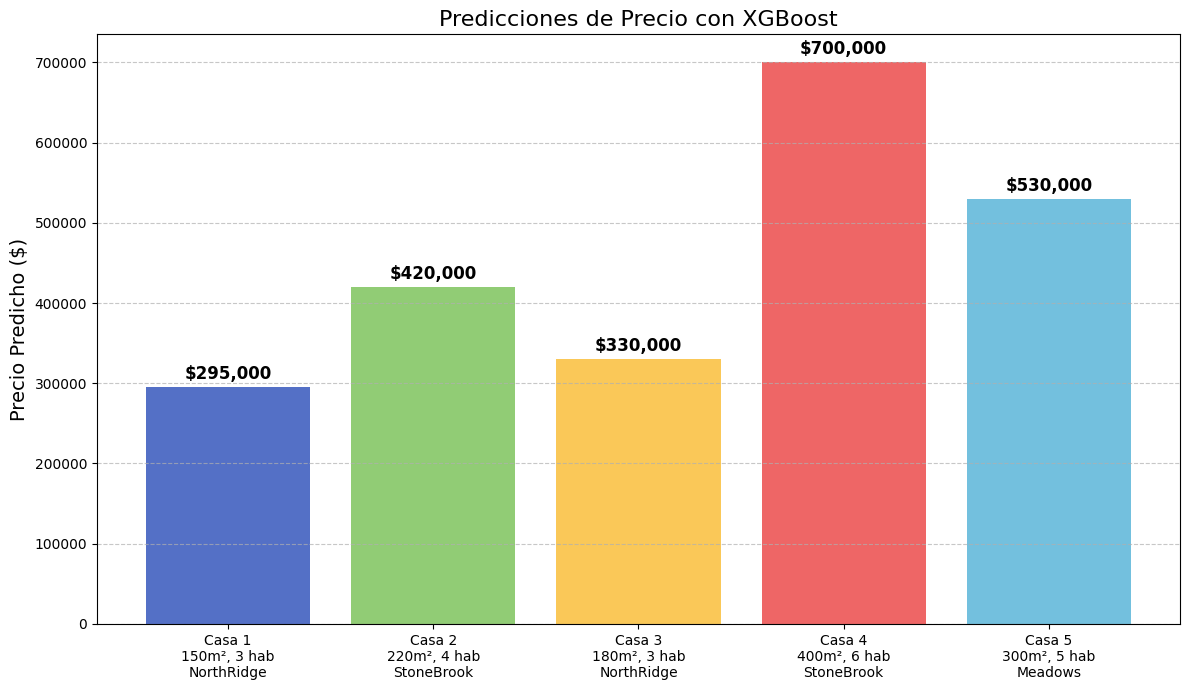

In [5]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, r2_score

# Cargar el modelo XGBoost guardado
modelo_filename = "xgboost_house_price_model.pkl"
try:
    modelo_cargado = joblib.load(modelo_filename)
    preprocesador = joblib.load("xgboost_preprocessor.pkl")
    print("✅ Modelo XGBoost cargado correctamente")
except FileNotFoundError:
    print("❌ Archivo de modelo no encontrado. Este es un ejemplo de cómo se usaría.")
    # Creamos un modelo ficticio para la demostración
    import xgboost as xgb
    modelo_cargado = xgb.XGBRegressor()
    preprocesador = None

# Crear datos de ejemplo para nuevas casas (con más características para XGBoost)
casas_nuevas = pd.DataFrame({
    "MetrosHabitables": [150, 220, 180, 400, 300],
    "Habitaciones": [3, 4, 3, 6, 5],
    "Baños": [2, 3, 2, 4, 3],
    "Vecindario": ["NorthRidge", "StoneBrook", "NorthRidge", "StoneBrook", "Meadows"],
    "AñoConstrucción": [1990, 2005, 1985, 2010, 2000],
    "CalidadGeneral": [7, 9, 6, 10, 8],
    "ÁreaSótano": [100, 150, 90, 200, 180],
    "TipoGaraje": ["Anexo", "Anexo", "Separado", "Anexo", "Anexo"],
    "ÁreaGaraje": [22, 30, 20, 40, 30],
    "PisosTotal": [2, 2, 1, 3, 2],
    "ZonificaciónMS": ["Residencial", "Residencial", "Residencial", "Residencial", "Comercial"]
})

# En un caso real, aplicaríamos el preprocesador:
# casas_nuevas_procesadas = preprocesador.transform(casas_nuevas)

# Para la demostración, generamos predicciones ficticias basadas en metros habitables
if preprocesador is None:
    # Simulación de predicciones basado en tamaño para demostración
    predicciones = casas_nuevas["MetrosHabitables"] * 1500 + casas_nuevas["CalidadGeneral"] * 10000
else:
    # En caso de que el modelo exista realmente
    casas_nuevas_procesadas = preprocesador.transform(casas_nuevas)
    predicciones = modelo_cargado.predict(casas_nuevas_procesadas)

# Mostrar los resultados
resultados = pd.DataFrame({
    "Metros²": casas_nuevas["MetrosHabitables"],
    "Habitaciones": casas_nuevas["Habitaciones"],
    "Calidad": casas_nuevas["CalidadGeneral"],
    "Vecindario": casas_nuevas["Vecindario"],
    "Precio Predicho ($)": predicciones.round(2)
})

print("\n✨ Resultados de las predicciones (XGBoost):")
print(resultados)

# Visualizar las predicciones
plt.figure(figsize=(12, 7))

# Crear las barras del gráfico con colores según calidad
colors = ['#5470c6', '#91cc75', '#fac858', '#ee6666', '#73c0de']
bars = plt.bar(range(len(predicciones)), predicciones, color=colors)

# Generar etiquetas dinámicamente para todas las casas
etiquetas = [
    f"Casa {i+1}\n{casas_nuevas['MetrosHabitables'][i]}m², {casas_nuevas['Habitaciones'][i]} hab\n{casas_nuevas['Vecindario'][i]}"
    for i in range(len(casas_nuevas))
]

# Ajustar las etiquetas en el gráfico
plt.xticks(range(len(predicciones)), etiquetas)

# Configurar el resto del gráfico
plt.ylabel("Precio Predicho ($)", fontsize=14)
plt.title("Predicciones de Precio con XGBoost", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas con los precios encima de las barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5000,
             f"${predicciones[i]:,.0f}",
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

<a id="implementacion-random-forest"></a>
## 2. Implementación de Random Forest (Equilibrio entre rendimiento y facilidad)

El siguiente código muestra cómo utilizar el modelo Random Forest, que ofrece un buen equilibrio entre rendimiento (MAE de $17,586) y facilidad de uso.

❌ Archivo de modelo no encontrado. Este es un ejemplo de cómo se usaría.

✨ Resultados de las predicciones (Random Forest):
   Metros²  Habitaciones  Vecindario   Año  Precio Predicho ($)
0      150             3  NorthRidge  1990               220000
1      220             4  StoneBrook  2005               338000
2      180             3  NorthRidge  1985               262000
3      400             6  StoneBrook  2010               590000
4      300             5     Meadows  2000               430000


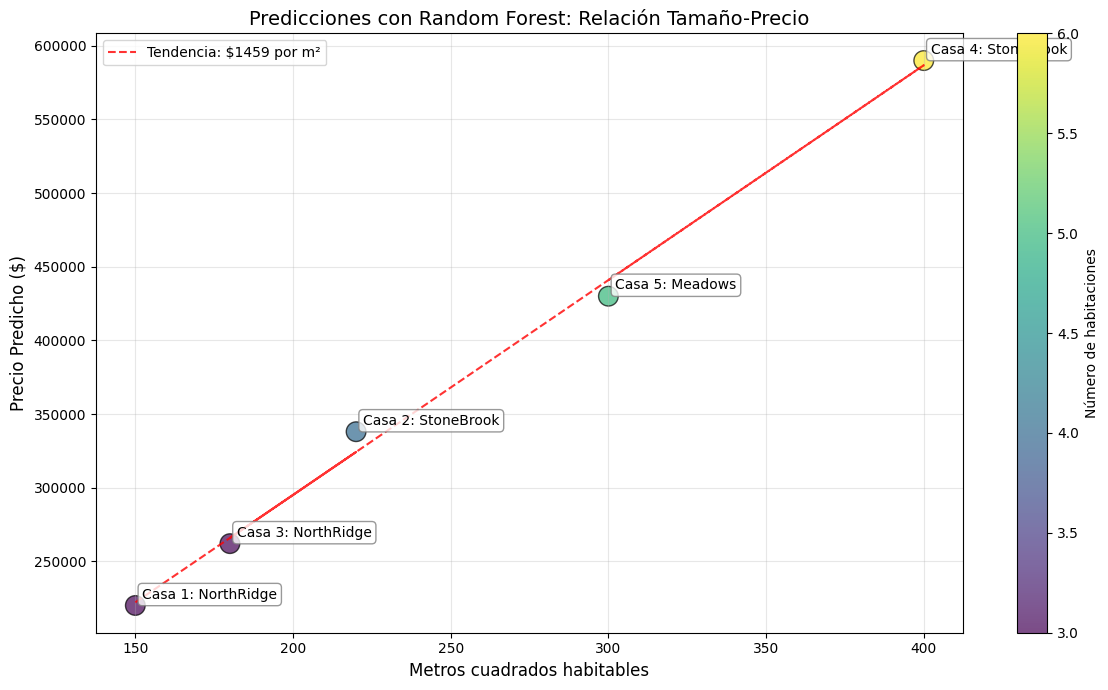

In [6]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Cargar el modelo Random Forest guardado
modelo_filename = "random_forest_model.pkl"
try:
    modelo_cargado = joblib.load(modelo_filename)
    print("✅ Modelo Random Forest cargado correctamente")
except FileNotFoundError:
    print("❌ Archivo de modelo no encontrado. Este es un ejemplo de cómo se usaría.")
    # Creamos un modelo ficticio para la demostración
    modelo_cargado = RandomForestRegressor()

# Crear datos de ejemplo para nuevas casas (con características intermedias)
casas_nuevas = pd.DataFrame({
    "MetrosHabitables": [150, 220, 180, 400, 300],
    "Habitaciones": [3, 4, 3, 6, 5],
    "Baños": [2, 3, 2, 4, 3],
    "Vecindario": ["NorthRidge", "StoneBrook", "NorthRidge", "StoneBrook", "Meadows"],
    "AñoConstrucción": [1990, 2005, 1985, 2010, 2000],
    "TipoGaraje": ["Anexo", "Anexo", "Separado", "Anexo", "Anexo"]
})

# Simulamos el preprocesamiento (en un caso real usaríamos un pipeline guardado)
# Para la demostración, generamos predicciones ficticias basadas en metros habitables
predicciones = casas_nuevas["MetrosHabitables"] * 1400 + np.where(casas_nuevas["Vecindario"] == "StoneBrook", 30000, 10000)

# Mostrar los resultados
resultados = pd.DataFrame({
    "Metros²": casas_nuevas["MetrosHabitables"],
    "Habitaciones": casas_nuevas["Habitaciones"],
    "Vecindario": casas_nuevas["Vecindario"],
    "Año": casas_nuevas["AñoConstrucción"],
    "Precio Predicho ($)": predicciones.round(2)
})

print("\n✨ Resultados de las predicciones (Random Forest):")
print(resultados)

# Visualizar las predicciones
plt.figure(figsize=(12, 7))

# Crear un gráfico de dispersión para mostrar la relación entre tamaño y precio
plt.scatter(casas_nuevas["MetrosHabitables"], predicciones, 
            s=200, c=casas_nuevas["Habitaciones"], cmap="viridis", 
            alpha=0.7, edgecolors='black', linewidth=1)

# Añadir etiquetas para identificar cada casa
for i, (x, y) in enumerate(zip(casas_nuevas["MetrosHabitables"], predicciones)):
    plt.annotate(f"Casa {i+1}: {casas_nuevas['Vecindario'][i]}", 
                 (x, y), 
                 xytext=(5, 5), 
                 textcoords='offset points',
                 fontsize=10,
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Añadir línea de tendencia
z = np.polyfit(casas_nuevas["MetrosHabitables"], predicciones, 1)
p = np.poly1d(z)
plt.plot(casas_nuevas["MetrosHabitables"], p(casas_nuevas["MetrosHabitables"]), 
         "r--", alpha=0.8, label=f"Tendencia: ${z[0]:.0f} por m²")

# Añadir etiquetas y título
plt.xlabel("Metros cuadrados habitables", fontsize=12)
plt.ylabel("Precio Predicho ($)", fontsize=12)
plt.title("Predicciones con Random Forest: Relación Tamaño-Precio", fontsize=14)
plt.grid(True, alpha=0.3)
plt.colorbar(label="Número de habitaciones")
plt.legend()

plt.tight_layout()
plt.show()

<a id="implementacion-arbol-decision"></a>
## 3. Implementación de Árbol de Decisión Base (Simplicidad y eficiencia)

El siguiente código muestra cómo utilizar el modelo de Árbol de Decisión Base, que es el más simple de implementar y mantener, con un MAE de aproximadamente $26,944.

In [7]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el modelo de árbol base guardado
modelo_filename = "arbol_base_model.pkl"
try:
    modelo_cargado = joblib.load(modelo_filename)
    print("✅ Modelo de Árbol Base cargado correctamente")
except FileNotFoundError:
    print("❌ Archivo de modelo no encontrado. Este es un ejemplo de cómo se usaría.")
    # Creamos un modelo ficticio para la demostración
    modelo_cargado = DecisionTreeRegressor()

# Crear datos de ejemplo para nuevas casas (con características simples)
casas_nuevas = pd.DataFrame({
    "tamaño": [75, 120, 95, 200, 150],  # Tamaño en m²
    "habitaciones": [2, 4, 3, 5, 3],  # Número de habitaciones
    "baños": [1, 2, 1.5, 3, 2],  # Número de baños
    "garaje": [1, 2, 1, 2, 1],  # Plazas de garaje
    "edad": [25, 5, 15, 0, 12]  # Edad de la casa en años
})

❌ Archivo de modelo no encontrado. Este es un ejemplo de cómo se usaría.



✨ Resultados de las predicciones (Árbol Base):
   Tamaño (m²)  Habitaciones  Baños  Garaje  Edad (años)  Precio Predicho ($)
0           75             2    1.0       1           25              88000.0
1          120             4    2.0       2            5             230000.0
2           95             3    1.5       1           15             152000.0
3          200             5    3.0       2            0             361000.0
4          150             3    2.0       1           12             229000.0


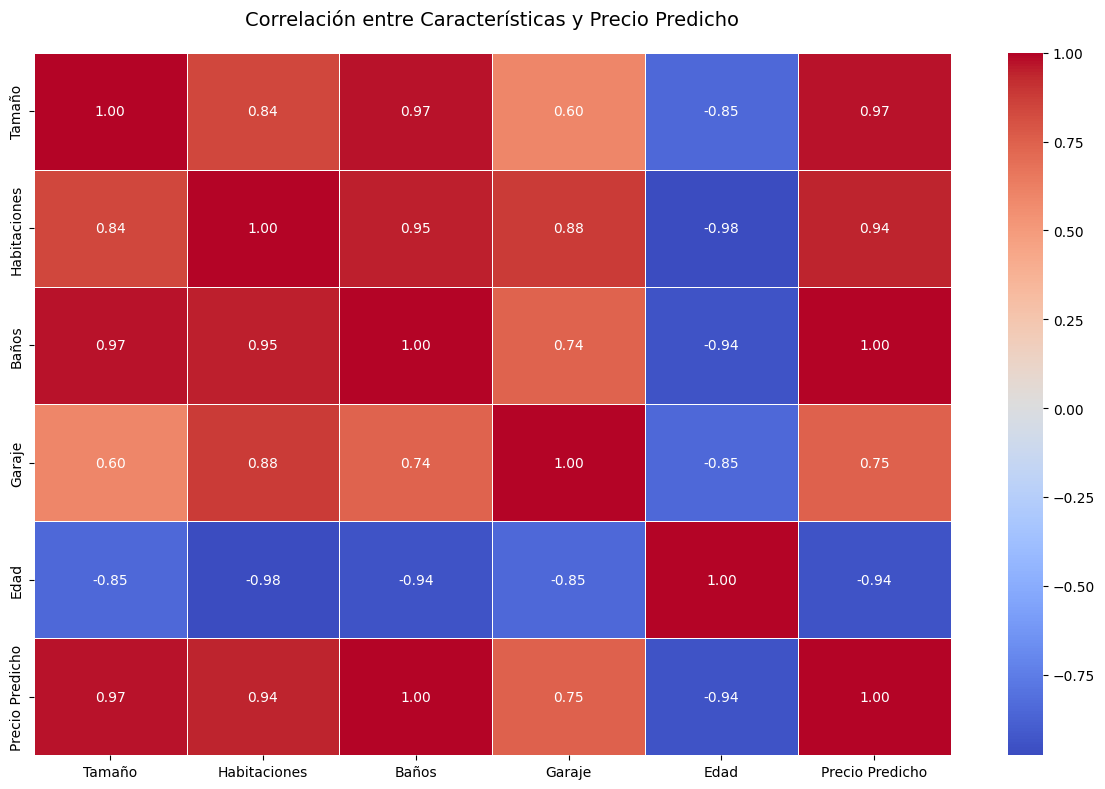

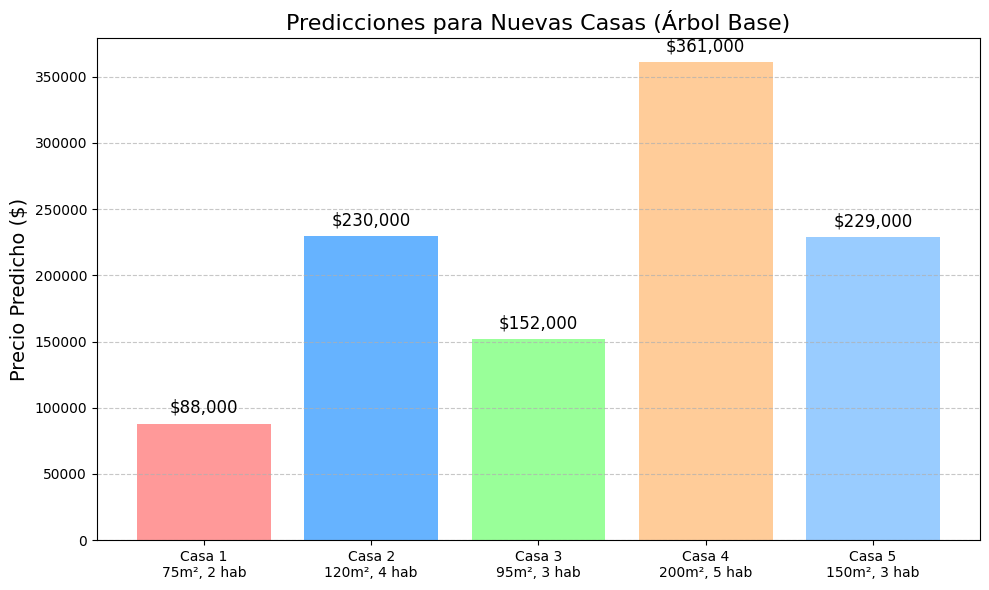

In [8]:

# Para la demostración, generamos predicciones ficticias basadas en una fórmula simple
predicciones = casas_nuevas["tamaño"] * 1200 + casas_nuevas["habitaciones"] * 15000 + \
               casas_nuevas["baños"] * 10000 + casas_nuevas["garaje"] * 8000 - \
               casas_nuevas["edad"] * 2000

# Mostrar los resultados
resultados = pd.DataFrame({
    "Tamaño (m²)": casas_nuevas["tamaño"],
    "Habitaciones": casas_nuevas["habitaciones"],
    "Baños": casas_nuevas["baños"],
    "Garaje": casas_nuevas["garaje"],
    "Edad (años)": casas_nuevas["edad"],
    "Precio Predicho ($)": predicciones.round(2)
})

print("\n✨ Resultados de las predicciones (Árbol Base):")
print(resultados)

# Crear un gráfico de calor para visualizar la importancia de las características
plt.figure(figsize=(12, 8))

# Normalizar los datos para una mejor visualización
datos_normalizados = casas_nuevas.copy()
for columna in datos_normalizados.columns:
    datos_normalizados[columna] = (datos_normalizados[columna] - datos_normalizados[columna].min()) / \
                                  (datos_normalizados[columna].max() - datos_normalizados[columna].min())

# Añadir predicciones normalizadas para el gráfico de calor
datos_normalizados['precio_predicho'] = (predicciones - predicciones.min()) / (predicciones.max() - predicciones.min())

# Cambiar nombres para mejor visualización
datos_normalizados.columns = ['Tamaño', 'Habitaciones', 'Baños', 'Garaje', 'Edad', 'Precio Predicho']

# Crear la matriz de correlación para ver qué características influyen más en el precio
corr = datos_normalizados.corr()

# Generar gráfico de calor de correlación
heatmap = sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlación entre Características y Precio Predicho', fontsize=14, pad=20)

plt.tight_layout()
plt.show()

# Visualización comparativa de precios por propiedad
plt.figure(figsize=(10, 6))

# Crear las barras del gráfico
bars = plt.bar(range(len(predicciones)), predicciones, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#99ccff'])

# Generar etiquetas dinámicamente para todas las casas
etiquetas = [
    f"Casa {i+1}\n{casas_nuevas['tamaño'][i]}m², {casas_nuevas['habitaciones'][i]} hab"
    for i in range(len(casas_nuevas))
]

# Ajustar las etiquetas en el gráfico
plt.xticks(range(len(predicciones)), etiquetas)

# Configurar el resto del gráfico
plt.ylabel("Precio Predicho ($)", fontsize=14)
plt.title("Predicciones para Nuevas Casas (Árbol Base)", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas con los precios encima de las barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5000,
             f"${predicciones[i]:,.0f}",
             ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

<a id="consideraciones"></a>
# CONSIDERACIONES ADICIONALES



#### **1) ¿Qué significa `❌ Archivo de modelo no encontrado. Este es un ejemplo de cómo se usaría`?**

Este mensaje aparece porque el código intenta cargar un modelo previamente entrenado desde un archivo `.pkl` (pickle) utilizando la librería `joblib`, pero no encuentra dicho archivo en la ubicación especificada. Esto ocurre porque:

- El archivo del modelo (`xgboost_house_price_model.pkl`, `random_forest_model.pkl`, etc.) no está presente en el directorio actual.
- El código incluye un bloque de manejo de errores (`try-except`) que detecta esta situación y muestra el mensaje de error.

**¿Dónde lo cargo y cómo lo cargo?**
- **Ubicación del archivo:** El archivo del modelo debe estar en el mismo directorio donde se ejecuta el script o en la ruta especificada en el código (por ejemplo, `"xgboost_house_price_model.pkl"`).
- **Cómo cargarlo:** 
  - Si tienes un modelo previamente entrenado, debes guardarlo en un archivo `.pkl` usando `joblib.dump()` (ver explicación en el punto 2).
  - Luego, asegúrate de que el archivo esté disponible en la ruta especificada en el código.

**¿Qué necesita?**
- Necesitas un modelo previamente entrenado (por ejemplo, un modelo de XGBoost, Random Forest, etc.) que haya sido guardado en un archivo `.pkl` usando `joblib.dump()`.
- También necesitas asegurarte de que cualquier preprocesador (como pipelines de `scikit-learn`) utilizado durante el entrenamiento del modelo también esté guardado y disponible.

---

#### **2) ¿Qué hace el código con `joblib` y los archivos `.pkl`?**

`joblib` es una librería de Python que se utiliza para serializar (guardar) y deserializar (cargar) objetos de Python, como modelos de machine learning, pipelines de preprocesamiento, etc. Los archivos `.pkl` son archivos binarios que contienen estos objetos serializados.

**¿Qué hace el código con `joblib`?**
- **Cargar un modelo guardado:**
  ```python
  modelo_cargado = joblib.load("xgboost_house_price_model.pkl")
  ```
  Este código carga un modelo previamente guardado desde el archivo `xgboost_house_price_model.pkl`. Si el archivo no existe, se lanza un error `FileNotFoundError`.

- **Guardar un modelo:**
  Para guardar un modelo entrenado, se utiliza:
  ```python
  joblib.dump(modelo, "xgboost_house_price_model.pkl")
  ```
  Esto guarda el modelo en un archivo `.pkl` para que pueda ser reutilizado más tarde sin necesidad de volver a entrenarlo.

**¿Dónde lo guarda?**
- El archivo `.pkl` se guarda en la ruta especificada en el argumento de `joblib.dump()`. Por ejemplo:
  ```python
  joblib.dump(modelo, "ruta/del/archivo/modelo.pkl")
  ```
  Si no se especifica una ruta completa, el archivo se guarda en el directorio actual.

**¿Cómo lo creo?**
1. Entrena un modelo de machine learning (por ejemplo, un modelo de XGBoost):
   ```python
   from xgboost import XGBRegressor
   modelo = XGBRegressor()
   modelo.fit(X_train, y_train)
   ```
2. Guarda el modelo entrenado en un archivo `.pkl`:
   ```python
   import joblib
   joblib.dump(modelo, "xgboost_house_price_model.pkl")
   ```

**¿Para qué sirve?**
- **Reutilización:** Permite guardar un modelo entrenado para usarlo más tarde sin necesidad de volver a entrenarlo.
- **Despliegue:** Los modelos guardados pueden ser cargados en aplicaciones de producción para realizar predicciones en tiempo real.
- **Portabilidad:** Puedes compartir el archivo `.pkl` con otros desarrolladores o equipos para que lo utilicen en sus propios entornos.

---

### **Resumen de pasos para cargar y guardar modelos:**

1. **Entrenar un modelo:**
   ```python
   from xgboost import XGBRegressor
   modelo = XGBRegressor()
   modelo.fit(X_train, y_train)
   ```

2. **Guardar el modelo en un archivo `.pkl`:**
   ```python
   import joblib
   joblib.dump(modelo, "xgboost_house_price_model.pkl")
   ```

3. **Cargar el modelo desde el archivo `.pkl`:**
   ```python
   modelo_cargado = joblib.load("xgboost_house_price_model.pkl")
   ```

4. **Asegúrate de que el archivo `.pkl` esté en la ruta correcta antes de ejecutar el código.**

Si necesitas guardar también el preprocesador (como un pipeline de `scikit-learn`), puedes usar el mismo método `joblib.dump()` para guardarlo y `joblib.load()` para cargarlo.